In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
tourney = pd.read_csv('NCAA_Tourney_2002_2019.csv')
tourney_adj = pd.read_csv('tourney_adj_1.csv')
training = pd.DataFrame()
adv = pd.read_csv('Team_SOS_fixed.csv', sep=',')

In [43]:
prediction = pd.read_csv('prediction_processed.csv')

# Data Pre-processing

In [3]:
training['result'] = tourney_adj['result']
training['Season'] = tourney_adj['Season']
training['team1_id'] = tourney_adj['team1_id']
training['team2_id'] = tourney_adj['team2_id']

In [4]:
def delta_seed(row):
    return row['team1_seed'] - row['team2_seed']
training['delta_seed'] = tourney_adj.apply(delta_seed, axis = 1)

In [5]:
training = training[(training['Season'] >= 2003)]


In [6]:
# Calculate Delta Ordinals
# No M ordinals in Fordham dataset, consider using Kaggle stats
# Consider using rpi 
mo = pd.read_csv('MMasseyOrdinals.csv')
mo = mo[(mo['RankingDayNum'] == 128) & (mo['Season'] >= 2003)] # See Note on MO

def delta_ord(row):
    cond =  (mo['Season'] == row['Season'])
    cond1 = (mo['TeamID'] == row['team1_id']) & cond
    cond2 = (mo['TeamID'] == row['team2_id']) & cond
    t1 = mo[cond1]['OrdinalRank'].mean()
    t2 = mo[cond2]['OrdinalRank'].mean()
    return  t1-t2

training['delta_MO'] = training.apply(delta_ord,axis=1)

In [7]:
rpi = pd.read_csv('TeamRPI.csv')

def delta_rpi(row):
    cond =  (rpi['Year'] == row['Season'])
    cond1 = (rpi['team_id'] == row['team1_id']) & cond
    cond2 = (rpi['team_id'] == row['team2_id']) & cond
    t1 = rpi[cond1]['RPI'].values
    t2 = rpi[cond2]['RPI'].values
    return  t1-t2

training['delta_rpi'] = training.apply(delta_rpi,axis=1)


In [8]:
# Process rpi data
training['delta_rpi'] = np.round(training['delta_rpi'].str.get(0), 3)
training['delta_rpi']

0       0.015
1      -0.003
2      -0.062
3       0.020
4       0.007
        ...  
1142    0.033
1143   -0.050
1144    0.019
1145   -0.019
1146   -0.040
Name: delta_rpi, Length: 1085, dtype: float64

In [9]:
print(training['delta_rpi'].max())
print(training['delta_rpi'].min())

0.215
-0.2


In [10]:
#Calculate winning percentage
#considering using Kaggle stats

def delta_pt_season_winpct(row):
    return row['team1_pt_team_season_wins']/(row['team1_pt_team_season_wins'] + row['team1_pt_team_season_losses'])- row['team2_pt_team_season_wins']/(row['team2_pt_team_season_wins'] + row['team2_pt_team_season_losses']) 

training['delta_pt_season_winpct'] = tourney_adj.apply(delta_pt_season_winpct, axis=1)

In [11]:
# deal with coach data
def delta_pt_school_ncaa(row):
    return row['team1_pt_school_ncaa'] - row['team2_pt_school_ncaa']
def delta_pt_overall_ncaa(row):
    return row['team1_pt_overall_ncaa'] - row['team2_pt_overall_ncaa']
def delta_pt_school_s16(row):
    return row['team1_pt_school_s16'] - row['team2_pt_school_s16']
def delta_pt_overall_s16(row):
    return row['team1_pt_overall_s16'] - row['team2_pt_overall_s16']
def delta_pt_school_ff(row):
    return row['team1_pt_school_ff'] - row['team2_pt_school_ff']
def delta_pt_overall_ff(row):
    return row['team1_pt_overall_ff'] - row['team2_pt_overall_ff']
def delta_coach_winpct(row): #coach winning percentage difference
    return row['team1_pt_career_overall_wins'] / (row['team1_pt_career_overall_wins'] + row['team2_pt_career_overall_losses']) - row['team1_pt_career_overall_wins'] / (row['team2_pt_career_overall_wins'] + row['team2_pt_career_overall_losses'])                 
def delta_coach_winsdf(row): #coach career wins difference
    return row['team1_pt_career_overall_wins'] - row['team2_pt_career_overall_wins']

training['delta_pt_school_ncaa'] = tourney_adj.apply(delta_pt_school_ncaa, axis=1)
training['delta_pt_overall_ncaa'] = tourney_adj.apply(delta_pt_overall_ncaa, axis=1)
training['delta_pt_school_s16'] = tourney_adj.apply(delta_pt_school_s16, axis=1)
training['delta_pt_overall_s16'] = tourney_adj.apply(delta_pt_overall_s16, axis=1)
training['delta_pt_school_ff'] = tourney_adj.apply(delta_pt_school_ff, axis=1)
training['delta_pt_overall_ff'] = tourney_adj.apply(delta_pt_overall_ff, axis=1)
training['delta_coach_winpct'] = tourney_adj.apply(delta_coach_winpct, axis=1)
training['delta_coach_winsdf'] = tourney_adj.apply(delta_coach_winsdf, axis=1)

In [12]:
#deal with stats
def delta_fg2pct(row):
    return row['team1_fg2pct'] - row['team2_fg2pct']
def delta_fg3pct(row):
    return row['team1_fg3pct'] - row['team2_fg3pct']
def delta_ftpct(row):
    return row['team1_ftpct'] - row['team2_ftpct']
def delta_blockpct(row):
    return row['team1_blockpct'] - row['team2_blockpct']
def delta_oppfg2pct(row):
    return row['team1_oppfg2pct'] - row['team2_oppfg2pct']
def delta_oppfg3pct(row):
    return row['team1_oppfg3pct'] - row['team2_oppfg3pct']
def delta_oppftpct(row):
    return row['team1_oppftpct'] - row['team2_oppftpct']
def delta_oppblockpct(row):
    return row['team1_oppblockpct'] - row['team2_oppblockpct']
def delta_f3grate(row):
    return row['team1_f3grate'] - row['team2_f3grate']
def delta_oppf3grate(row):
    return row['team1_oppf3grate'] - row['team2_oppf3grate']
def delta_arate(row):
    return row['team1_arate'] - row['team2_arate']
def delta_opparate(row):
    return row['team1_opparate'] - row['team2_opparate']
def delta_stlrate(row):
    return row['team1_stlrate'] - row['team2_stlrate']
def delta_oppstlrate(row):
    return row['team1_oppstlrate'] - row['team2_oppstlrate']
def delta_oppftpct(row):
    return row['team1_oppftpct'] - row['team2_oppftpct']
##advanced stats
def delta_tempo(row):
    return row['team1_tempo'] - row['team2_tempo']
def delta_adjtempo(row):
    return row['team1_adjtempo'] - row['team2_adjtempo']
def delta_adjoe(row):
    return row['team1_adjoe'] - row['team2_adjoe']
def delta_adjde(row):
    return row['team1_adjde'] - row['team2_adjde']


training['delta_fg2pct'] = tourney_adj.apply(delta_fg2pct, axis=1)
training['delta_fg3pct'] = tourney_adj.apply(delta_fg3pct, axis=1)
training['delta_ftpct'] = tourney_adj.apply(delta_ftpct, axis=1)
training['delta_blockpct'] = tourney_adj.apply(delta_blockpct, axis=1)
training['delta_oppfg2pct'] = tourney_adj.apply(delta_oppfg2pct, axis=1)
training['delta_oppfg3pct'] = tourney_adj.apply(delta_oppfg3pct, axis=1)
training['delta_oppfg3pct'] = tourney_adj.apply(delta_oppfg3pct, axis=1)
training['delta_oppftpct'] = tourney_adj.apply(delta_oppftpct, axis=1)
training['delta_oppblockpct'] = tourney_adj.apply(delta_oppblockpct, axis=1)
training['delta_f3grate'] = tourney_adj.apply(delta_f3grate, axis=1)
training['delta_oppf3grate'] = tourney_adj.apply(delta_oppf3grate, axis=1)
training['delta_arate'] = tourney_adj.apply(delta_arate, axis=1)
training['delta_opparate'] = tourney_adj.apply(delta_opparate, axis=1)
training['delta_stlrate'] = tourney_adj.apply(delta_stlrate, axis=1)
training['delta_oppstlrate'] = tourney_adj.apply(delta_oppstlrate, axis=1)
#training['delta_tempo'] = tourney_adj.apply(delta_tempo, axis=1)
training['delta_adjtempo'] = tourney_adj.apply(delta_adjtempo, axis=1)
training['delta_adjoe'] = tourney_adj.apply(delta_adjoe, axis=1)
training['delta_adjde'] = tourney_adj.apply(delta_adjde, axis=1)


In [13]:
def delta_sos(row):
    return row['delta_SOS1'] - row['delta_SOS2']

training['delta_SOS'] = tourney_adj.apply(delta_sos, axis=1)

In [14]:
#training['delta_SOS']

In [15]:
training.columns

Index(['result', 'Season', 'team1_id', 'team2_id', 'delta_seed', 'delta_MO',
       'delta_rpi', 'delta_pt_season_winpct', 'delta_pt_school_ncaa',
       'delta_pt_overall_ncaa', 'delta_pt_school_s16', 'delta_pt_overall_s16',
       'delta_pt_school_ff', 'delta_pt_overall_ff', 'delta_coach_winpct',
       'delta_coach_winsdf', 'delta_fg2pct', 'delta_fg3pct', 'delta_ftpct',
       'delta_blockpct', 'delta_oppfg2pct', 'delta_oppfg3pct',
       'delta_oppftpct', 'delta_oppblockpct', 'delta_f3grate',
       'delta_oppf3grate', 'delta_arate', 'delta_opparate', 'delta_stlrate',
       'delta_oppstlrate', 'delta_adjtempo', 'delta_adjoe', 'delta_adjde',
       'delta_SOS'],
      dtype='object')

In [16]:
cols = ['delta_seed', 'delta_rpi', 'delta_MO', 'delta_pt_season_winpct','delta_pt_overall_s16', 'delta_pt_school_s16',
        'delta_pt_school_ncaa', 'delta_pt_overall_ncaa', 'delta_pt_school_ff','delta_pt_overall_ff', 'delta_coach_winpct', 'delta_coach_winsdf', 'delta_blockpct',
        'delta_fg2pct','delta_fg3pct','delta_ftpct',
        'delta_oppfg3pct','delta_oppftpct','delta_oppblockpct','delta_f3grate','delta_oppf3grate',
        'delta_stlrate','delta_arate','delta_adjtempo','delta_adjoe','delta_adjde', 'delta_SOS']   

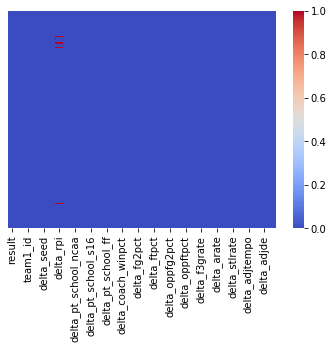

In [17]:
sns.heatmap(training.isnull(), cmap='coolwarm', yticklabels=False)

In [18]:
training.dropna(inplace=True, axis=0)

In [19]:
testing = training[training['Season'] >= 2017]


In [20]:
testing.head()

,result,Season,team1_id,team2_id,delta_seed,delta_MO,delta_rpi,delta_pt_season_winpct,delta_pt_school_ncaa,delta_pt_overall_ncaa,...,delta_f3grate,delta_oppf3grate,delta_arate,delta_opparate,delta_stlrate,delta_oppstlrate,delta_adjtempo,delta_adjoe,delta_adjde,delta_SOS
0,0,2019,1341,1192,0,1.343750,0.015,0.029412,0,0,...,-1.372513,-2.615148,-4.983443,0.615764,0.012533,-0.019226,4.1858,-4.6410,-4.5910,0.31
1,1,2019,1125,1396,0,-3.749038,-0.003,0.125000,-1,-10,...,6.153309,-3.502142,7.101837,-5.426304,-0.032552,0.005547,2.3659,5.9610,2.3230,-6.53
2,0,2019,1300,1295,0,92.859375,-0.062,-0.013369,3,3,...,-11.582364,-1.713508,13.415030,7.545996,0.007333,0.011520,0.4153,-9.9199,-1.2120,-8.99
3,1,2019,1113,1385,0,-7.843750,0.020,0.060606,0,1,...,-2.573200,0.772655,0.899414,0.687085,-0.035586,0.015811,0.0084,0.1040,-2.3596,0.56
4,0,2019,1257,1278,-3,-22.453125,0.007,-0.011586,-1,7,...,14.886550,3.223880,-6.856453,-1.875984,-0.006203,-0.003399,-0.3106,2.7000,-3.8352,-0.23


In [21]:
training = training[training['Season'] < 2017]

# Feature Selection

## VIF

In [22]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [23]:
#gather features
features = "+".join(training[cols])

# get y and X dataframes based on this regression:
y, X = dmatrices('result ~' + features, training, return_type='dataframe')

In [24]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif = vif[vif['VIF Factor'] < 100] 

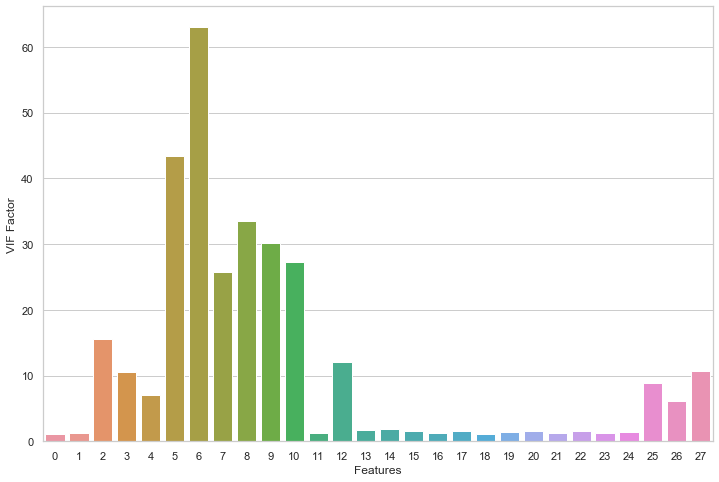

In [25]:
sns.set(style = 'whitegrid')
plt.figure(figsize=(12,8))
plt.xlabel("Features")
sns.barplot(y = vif['VIF Factor'].round(1), x = vif.index)

In [26]:
vif.round(1)

,VIF Factor,features
0,1.1,Intercept
1,1.2,delta_seed
2,15.6,delta_rpi
3,10.6,delta_MO
4,7.0,delta_pt_season_winpct
5,43.4,delta_pt_overall_s16
6,63.0,delta_pt_school_s16
7,25.8,delta_pt_school_ncaa
8,33.5,delta_pt_overall_ncaa
9,30.2,delta_pt_school_ff


In [27]:
#We remove features that have high vifs
cols.remove('delta_pt_overall_s16')
cols.remove('delta_pt_school_ncaa')
cols.remove('delta_pt_overall_ncaa')
cols.remove('delta_pt_school_ff')
cols.remove('delta_pt_overall_ff')
cols.remove('delta_coach_winsdf')
cols.remove('delta_SOS')

In [29]:
print(training.shape)
print(testing.shape)

(866, 34)
(197, 34)


## Tree-based Feature Selection

C:\Users\Zhihan Yang\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Feature ranking:
1. feature 0 (0.189415)  delta_seed
2. feature 1 (0.166459)  delta_rpi
3. feature 2 (0.062224)  delta_MO
4. feature 18 (0.061148)  delta_adjoe
5. feature 19 (0.048152)  delta_adjde
6. feature 3 (0.043570)  delta_pt_season_winpct
7. feature 4 (0.038158)  delta_pt_school_s16
8. feature 6 (0.032826)  delta_blockpct
9. feature 10 (0.032755)  delta_oppfg3pct
10. feature 7 (0.032099)  delta_fg2pct
11. feature 5 (0.031978)  delta_coach_winpct
12. feature 16 (0.030769)  delta_arate
13. feature 15 (0.030422)  delta_stlrate
14. feature 9 (0.029428)  delta_ftpct
15. feature 11 (0.029148)  delta_oppftpct
16. feature 12 (0.028670)  delta_oppblockpct
17. feature 14 (0.028664)  delta_oppf3grate
18. feature 17 (0.028596)  delta_adjtempo
19. feature 8 (0.027949)  delta_fg3pct
20. feature 13 (0.027571)  delta_f3grate


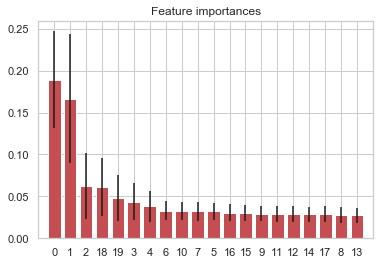

In [30]:
## ExtraTree Classifier case
#from sklearn.datasets import make_classification

from sklearn.ensemble import ExtraTreesClassifier

X = training[cols]
y = training['result']

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=500,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)  %s" % (f + 1, indices[f], importances[indices[f]], cols[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [31]:
cols.remove('delta_fg3pct')
cols.remove('delta_f3grate')
cols.remove('delta_adjtempo')
cols.remove('delta_oppblockpct')
cols.remove('delta_oppf3grate')
#cols.remove('delta_ftpct')

## Lasso (L1 regularization)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
#training.info()

In [ ]:
#data = training[cols].drop('delta_MO', axis=1)
#data = training[cols]

#X_train, X_test, y_train, y_test = train_test_split(
#    data, y, test_size=0.3)
#X_train.shape, X_test.shape

In [33]:
scaler = StandardScaler()
scaler.fit(training[cols])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [34]:
#Lasso regularization with logistic

sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
#sel_ = SelectFromModel(LinearSVC(C=0.01, penalty='l1', dual=False))
sel_.fit(scaler.transform(training[cols].fillna(0)), training['result'])

SelectFromModel(estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=None)

In [35]:
print([i for i in cols])
print([i for i in sel_.get_support()])
print('\n')
print('Number of features to be removed: ', np.sum(sel_.estimator_.coef_ == 0))
removed_feats = training[cols].columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

['delta_seed', 'delta_rpi', 'delta_MO', 'delta_pt_season_winpct', 'delta_pt_school_s16', 'delta_coach_winpct', 'delta_blockpct', 'delta_fg2pct', 'delta_ftpct', 'delta_oppfg3pct', 'delta_oppftpct', 'delta_stlrate', 'delta_arate', 'delta_adjoe', 'delta_adjde']
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


Number of features to be removed:  0


Index([], dtype='object')

In [ ]:
# In case we want to remove some features

#cols.remove('delta_pt_overall_s16')
#cols.remove('delta_ftpct')
#cols.remove('delta_adjoe')
#cols.remove('delta_oppftpct')
#cols.remove('delta_blockpct')

In [ ]:
training[cols].head()

# Modelling - Logistic Regression

In [36]:
# A simple logistic regression for comparison

def LogisticRegression_1(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import LogisticRegression
    #scaler = StandardScaler()
    #scaler.fit(X_train.fillna(0))
    logit = LogisticRegression()
    logit.fit(X_train, y_train)
    logit.predict(X_train)
    logit.predict(X_test)
    print("training score:",logit.score(X_train,y_train))
    print("testing score:",logit.score(X_test,y_test))
    #print("result:",result(logit.predict(X_train),y_train))
    #print("MSE:",mean_squared_error(y_test, logit.predict(X_test)))
    print('training log_loss:',log_loss(y_train,logit.predict_proba(X_train)))
    print('testing log_loss:',log_loss(y_test,logit.predict_proba(X_test)))
    
    #mse = mean_squared_error(y_test, logit.predict(X_test))
    
    return logit.predict(X_test)

In [37]:
from sklearn.metrics import log_loss, f1_score, accuracy_score

logit_result = LogisticRegression_1(training[cols], testing[cols], training['result'], testing['result'])

training score: 0.7956120092378753
testing score: 0.751269035532995
training log_loss: 0.40737541588702564
testing log_loss: 0.5168633325327716


In [38]:
from sklearn.metrics import log_loss, classification_report

compare = pd.DataFrame()
compare['result'] = testing['result']
compare['logit_testing'] = logit_result

def suedo_result(row, prediction):
        if row[prediction] > 0.50:
            return 1
        else:
            return 0
compare['logit_test_result'] = compare.apply(suedo_result, prediction='logit_testing',axis=1)

In [39]:
print('Logistic Regression testset Evaluation\n')
print('-------------------\n')
print(f1_score(compare['result'], compare['logit_test_result']))
print('\n')
print(classification_report(compare['result'], compare['logit_test_result']))

Logistic Regression testset Evaluation

-------------------

0.7512690355329948


             precision    recall  f1-score   support

          0       0.74      0.76      0.75        97
          1       0.76      0.74      0.75       100

avg / total       0.75      0.75      0.75       197



# Modelling - Lightgbm

In [40]:
import lightgbm as lgbm
import xgboost as xgb
from sklearn.model_selection import KFold
import gc

In [41]:
#Lightgbm parameters

lgbm_param = {
            'learning_rate': 0.01,
            'num_leaves': 127,
            'objective': 'binary',
            #'subsample': 0.9,
            'max_depth': 15,
            'feature fraction': 0.6,
            "boosting_type": "gbdt",
            "bagging_seed": 11,
            'min_child_weight': 2,
            #'silent': 1,
            'verbosity': -1,
            'metric': 'binary_logloss'
           }


In [46]:
#lightgbm probability

#Xtrain = X_train[cols].values.astype(np.float32, copy=False)
#d_train = lgbm.Dataset(X_train[cols], label=y_train)

NFOLDS = 10
folds = KFold(n_splits=NFOLDS)

splits = folds.split(training[cols], training['result'])

y_preds_lgbm = np.zeros(testing[cols].shape[0])
final_preds_lgbm = np.zeros(prediction[cols].shape[0])
y_oof_lgbm = np.zeros(training[cols].shape[0])
  
for fold_n, (train_index, valid_index) in enumerate(splits):
    print('Fold:',fold_n+1)
    X_train, X_valid = X[cols].iloc[train_index], X[cols].iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    dtrain = lgbm.Dataset(X_train, y_train)
    dvalid = lgbm.Dataset(X_valid, y_valid)
    #test_set = lgbm.Dataset(training[cols])
    #pred_set = xgb.Dmatrix(testing[cols])
    
    lgbm_clf  = lgbm.train(lgbm_param, dtrain, 5000, valid_sets = [dtrain, dvalid], 
                           verbose_eval=200, early_stopping_rounds=500)
    
    y_pred_valid = lgbm_clf.predict(X_valid)
    y_oof_lgbm[valid_index] = y_pred_valid
    
    y_preds_lgbm += lgbm_clf.predict(testing[cols], num_iteration=lgbm_clf.best_iteration) / NFOLDS
    final_preds_lgbm += lgbm_clf.predict(prediction[cols], num_iteration=lgbm_clf.best_iteration) / NFOLDS
    del X_train, X_valid, y_train, y_valid
    gc.collect()


Fold: 1
Training until validation scores don't improve for 500 rounds
[200]	training's binary_logloss: 0.267301	valid_1's binary_logloss: 0.364854
[400]	training's binary_logloss: 0.133773	valid_1's binary_logloss: 0.336058
[600]	training's binary_logloss: 0.079162	valid_1's binary_logloss: 0.341701
[800]	training's binary_logloss: 0.0566391	valid_1's binary_logloss: 0.339906
Early stopping, best iteration is:
[329]	training's binary_logloss: 0.168236	valid_1's binary_logloss: 0.334388
Fold: 2
Training until validation scores don't improve for 500 rounds
[200]	training's binary_logloss: 0.260976	valid_1's binary_logloss: 0.399271
[400]	training's binary_logloss: 0.12938	valid_1's binary_logloss: 0.392758
[600]	training's binary_logloss: 0.076601	valid_1's binary_logloss: 0.408214
[800]	training's binary_logloss: 0.0551096	valid_1's binary_logloss: 0.428665
Early stopping, best iteration is:
[484]	training's binary_logloss: 0.101261	valid_1's binary_logloss: 0.388209
Fold: 3
Training un

In [48]:
#compare = pd.DataFrame()
#compare['result'] = testing['result']
compare['lgbm_testing'] = y_preds_lgbm

def suedo_result(row, prediction):
        if row[prediction] > 0.50:
            return 1
        else:
            return 0
compare['lgbm_test_result'] = compare.apply(suedo_result, prediction='lgbm_testing',axis=1)

In [49]:
#lightgbm evalution
print('Lightgbm testset Evaluation\n')
print('-------------------\n')
print('Logloss: ', log_loss(compare['result'], y_preds_lgbm))
print('\n')
print(classification_report(compare['result'], compare['lgbm_test_result']))


Lightgbm testset Evaluation

-------------------

Logloss:  0.44332474099919683


             precision    recall  f1-score   support

          0       0.80      0.77      0.79        97
          1       0.79      0.81      0.80       100

avg / total       0.79      0.79      0.79       197



Text(0.5, 1.0, 'LightGBM - Feature Importance')

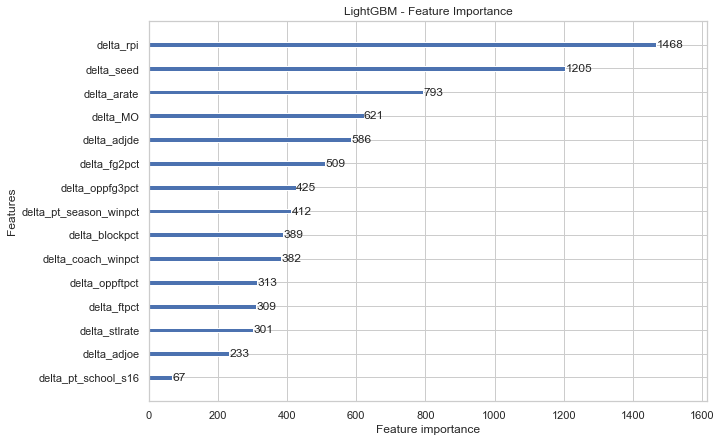

In [50]:
fig, ax = plt.subplots(figsize=(10, 7))
lgbm.plot_importance(lgbm_clf, max_num_features=30, ax=ax)
plt.title("LightGBM - Feature Importance")

In [ ]:
#np.round(y_preds_lgbm,3)

In [51]:
#lightgbm regressor with cv

from lightgbm import LGBMClassifier, LGBMRegressor
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score

target = training['result']
sub_preds = np.zeros(training[cols].shape[0])

trn_x, val_x, trn_y, val_y = train_test_split(training[cols], target, test_size=0.2, random_state=101) 
feature_importance_df = pd.DataFrame() 
    
lgbm_reg = LGBMRegressor(
        n_estimators= 5000,
        learning_rate=0.01,
        num_leaves=127,
        objective = 'regression',
        #colsample_bytree=.9,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        #silent=-1,
        #verbose=-1,
        
        )
        
lgbm_reg.fit(trn_x, trn_y, 
        eval_set= [(trn_x, trn_y), (val_x, val_y)], 
        eval_metric='logloss', verbose=500, early_stopping_rounds=500  #30
    )

sub_preds = lgbm_reg.predict(testing[cols], num_iteration = lgbm_reg.best_iteration_)
final_preds_lgbm_reg = lgbm_reg.predict(prediction[cols], num_iteration = lgbm_reg.best_iteration_)

fold_importance_df = pd.DataFrame()
fold_importance_df["feature"] = cols
fold_importance_df["importance"] = lgbm_reg.feature_importances_
feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)

Training until validation scores don't improve for 500 rounds
[500]	training's l2: 0.0366801	valid_1's l2: 0.156385
Early stopping, best iteration is:
[177]	training's l2: 0.0746646	valid_1's l2: 0.150308


In [52]:
lgbm_reg.best_score_

defaultdict(collections.OrderedDict,
            {'training': OrderedDict([('l2', 0.07466461417488521)]),
             'valid_1': OrderedDict([('l2', 0.15030759526094115)])})

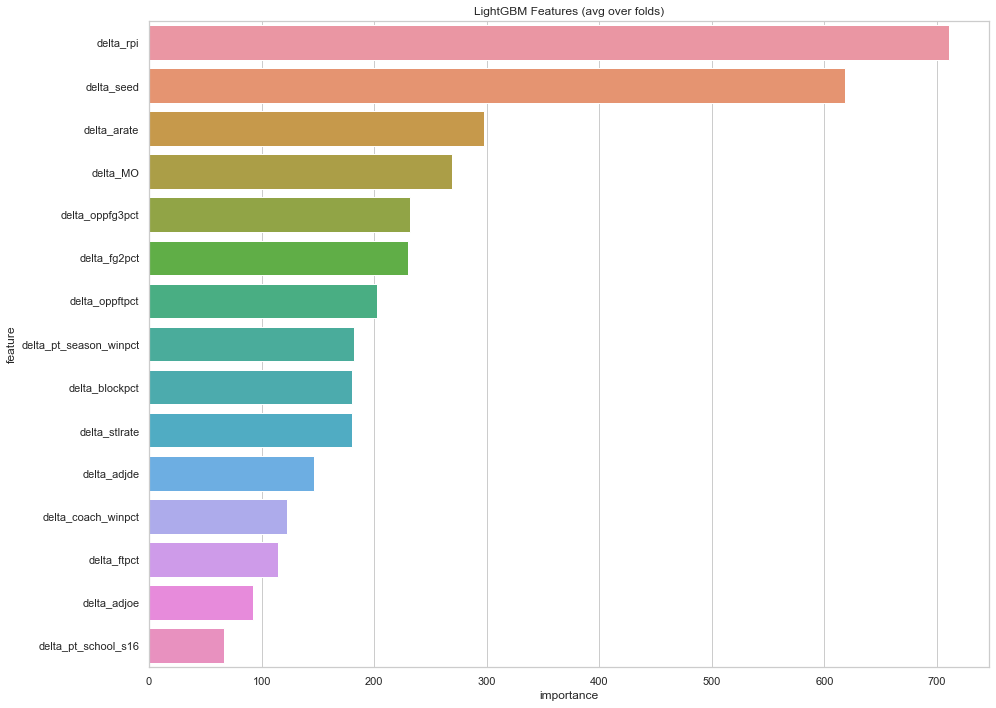

In [53]:
col = feature_importance_df[["feature", "importance"]].groupby("feature").mean().sort_values(
    by="importance", ascending=False)[:50].index

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(col)]

plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
#plt.savefig('lgbm_importances.png')

In [54]:
compare['lgbm_reg_testing'] = sub_preds
compare['lgbm_test_result_2'] = compare.apply(suedo_result, prediction='lgbm_reg_testing',axis=1)

In [55]:
#Lightgbm evaluation
print('Lightgbm Regressor testset Evaluation\n')
print('-------------------\n')
print('Logloss: ', log_loss(compare['result'], sub_preds))
print('\n')
print(classification_report(compare['result'], compare['lgbm_test_result_2']))

Lightgbm Regressor testset Evaluation

-------------------

Logloss:  0.44231711666538626


             precision    recall  f1-score   support

          0       0.81      0.76      0.79        97
          1       0.78      0.83      0.81       100

avg / total       0.80      0.80      0.80       197



# Modelling - XGboost

In [56]:
# A simplt xgboost to have a try

params_xgb = {'colsample_bytree': 0.8,                 
              'learning_rate': 0.01,
              'max_depth': 31,
              'subsample': 1,
              'objective':'binary:logistic',
              'eval_metric':'logloss',
              'min_child_weight':3,
              'gamma': 0.25,
              'n_estimators': 5000,
              'verbosity': 0,
              'eval_metric': 'logloss' 
             }


In [59]:
#xgboost
NFOLDS = 10
folds = KFold(n_splits=NFOLDS)

splits = folds.split(training[cols], training['result'])

y_preds_xgb = np.zeros(testing[cols].shape[0])
final_preds_xgb = np.zeros(prediction[cols].shape[0])
y_oof_xgb = np.zeros(training[cols].shape[0])
  
for fold_n, (train_index, valid_index) in enumerate(splits):
    print('Fold:',fold_n+1)
    X_train, X_valid = X[cols].iloc[train_index], X[cols].iloc[valid_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
    
    train_set = xgb.DMatrix(X_train, y_train)
    val_set = xgb.DMatrix(X_valid, y_valid)
    test_set = xgb.DMatrix(testing[cols])
    pred_set = xgb.DMatrix(prediction[cols])
    
    xgb_clf = xgb.train(params_xgb, train_set,num_boost_round=5000, evals=[(train_set, 'train'), (val_set, 'val')], early_stopping_rounds= 500, verbose_eval=500)
    
    y_preds_xgb += xgb_clf.predict(test_set, ntree_limit= xgb_clf.best_iteration) / NFOLDS
    final_preds_xgb += xgb_clf.predict(pred_set, ntree_limit = xgb_clf.best_iteration) / NFOLDS
    del X_train, X_valid, y_train, y_valid
    gc.collect()


Fold: 1
[0]	train-logloss:0.688373	val-logloss:0.689082
Multiple eval metrics have been passed: 'val-logloss' will be used for early stopping.

Will train until val-logloss hasn't improved in 500 rounds.
[500]	train-logloss:0.13383	val-logloss:0.340275
Stopping. Best iteration:
[430]	train-logloss:0.15075	val-logloss:0.339034

Fold: 2
[0]	train-logloss:0.687953	val-logloss:0.689759
Multiple eval metrics have been passed: 'val-logloss' will be used for early stopping.

Will train until val-logloss hasn't improved in 500 rounds.
[500]	train-logloss:0.131486	val-logloss:0.388638
Stopping. Best iteration:
[394]	train-logloss:0.160403	val-logloss:0.381794

Fold: 3
[0]	train-logloss:0.687835	val-logloss:0.689228
Multiple eval metrics have been passed: 'val-logloss' will be used for early stopping.

Will train until val-logloss hasn't improved in 500 rounds.
[500]	train-logloss:0.130683	val-logloss:0.382881
Stopping. Best iteration:
[368]	train-logloss:0.16752	val-logloss:0.375901

Fold: 4
[0

In [ ]:
# Log loss function

def log_loss_cond(actual, predict_prob):
    log_loss = 0
    for i in actual:
        if i == 1:  
        # use natural logarithm
            log_loss += -np.log(actual[i]*predict_prob[i]) 
        else:
            log_loss += -np.log(1 - predict_prob[i])
    return log_loss/len(actual)

In [60]:
compare['xgb_testing'] = y_preds_xgb
compare['xgb_test_result'] = compare.apply(suedo_result, prediction='xgb_testing',axis=1)


In [61]:
#xgboost evaluation

print('XGBoost testset Evaluation\n')
print('-------------------\n')
print('Logloss: ', log_loss(compare['result'], compare['xgb_testing']))
print('\n')
print(classification_report(compare['result'], compare['xgb_test_result']))


XGBoost testset Evaluation

-------------------

Logloss:  0.4421999161617198


             precision    recall  f1-score   support

          0       0.83      0.75      0.79        97
          1       0.78      0.85      0.81       100

avg / total       0.80      0.80      0.80       197



In [62]:
from sklearn.metrics import f1_score

def ensemble(a,b):
    
    compare['ensemble_testing'] = b * compare['xgb_testing'] + a * compare['lgbm_testing']
    compare['ensemble_result'] = compare.apply(suedo_result, prediction='ensemble_testing',axis=1)
    return log_loss(compare['result'], compare['ensemble_testing']), f1_score(compare['result'], compare['ensemble_result'])
    

In [65]:

print(ensemble(0.5,0.5))
print(ensemble(0.3,0.7))

(0.4415859153245205, 0.803921568627451)
(0.44152732183122545, 0.8097560975609757)


In [ ]:
compare['ensemble_testing'].sort_values(ascending=False)

In [ ]:
compare['logit_testing'].sort_values(ascending=False)

In [ ]:
compare['lgbm_testing'].sort_values(ascending=False)

In [ ]:
compare['xgb_testing'].sort_values(ascending=False)

In [ ]:
# swithc back game_id for submission

def game_id_1(row):
    cond1 = ((row['team1_id'] == tourney['team1_id']) & (row['team2_id'] == tourney['team2_id'])) & (row['Season'] == tourney['season'])                 
    cond2 =  ((row['team2_id'] == tourney['team1_id']) & (row['team1_id'] == tourney['team2_id'])) & (row['Season'] == tourney['season'])      
    if row['result'] == 1:    
        return tourney[cond1]['game_id'].values
    else:
        return tourney[cond2]['game_id'].values

training['game_id'] = training.apply(game_id_1, axis=1)


In [ ]:
training['game_id'] = training['game_id'].str.get(0)
training['game_id'].isnull().value_counts()

In [ ]:
training[['team1_id','team2_id','game_id','result']]

In [ ]:
training['prediction']

In [ ]:
# create game_id
submission = pd.DataFrame()

def prob(row):
    if row['result'] == 0:
        return (1-row['prediction'])
    else:
        return row['prediction']

submission['id'] = training['game_id']
submission['probability'] = training.apply(prob, axis=1)

In [ ]:
submission.head()

# Interesting Results

In [71]:
jumpman = pd.DataFrame()
final = pd.read_csv('NCAA_Tourney_2020.csv')

In [72]:
final['result'] = 0.7 * final_preds_xgb + 0.3 * final_preds_lgbm_reg


In [73]:
final.head()

,game_id,team1_id,team2_id,season,team1_seed,team2_seed,team1_position,team2_position,strongseed,weakseed,...,team2_ap_final,team1_f3grate.1,team1_oppf3grate.1,team2_f3grate.1,team2_oppf3grate.1,team1_f3grate.2,team1_oppf3grate.2,team2_f3grate.2,team2_oppf3grate.2,result
0,2020-1124-1257,1124,1257,2020,1,2,W01,W02,1,2,...,15.0,36.895388,34.981459,37.996642,41.027088,36.895388,34.981459,37.996642,41.027088,0.474494
1,2020-1124-1371,1124,1371,2020,1,3,W01,W03,1,3,...,16.0,36.895388,34.981459,40.535918,34.490482,36.895388,34.981459,40.535918,34.490482,0.729602
2,2020-1124-1120,1124,1120,2020,1,4,W01,W04,1,4,...,20.0,36.895388,34.981459,44.111349,36.250000,36.895388,34.981459,44.111349,36.250000,0.654718
3,2020-1124-1228,1124,1228,2020,1,5,W01,W05,1,5,...,21.0,36.895388,34.981459,30.599548,32.481545,36.895388,34.981459,30.599548,32.481545,0.940996
4,2020-1124-1234,1124,1234,2020,1,6,W01,W06,1,6,...,NaN,36.895388,34.981459,37.633833,40.000000,36.895388,34.981459,37.633833,40.000000,0.924543


In [74]:
final.to_csv('Jumpman_2020.csv', index=False)

# Result Submission (Final)

In [109]:
cond = (final['team1_seed'] == 1)
cond1 = (final['team1_region'] == 'W') & (final['team2_region'] == 'W') & cond
cond2 = (final['team1_region'] == 'X') & (final['team2_region'] == 'X') & cond
cond3 = (final['team1_region'] == 'Y') & (final['team2_region'] == 'Y') & cond
cond4 = (final['team1_region'] == 'Z') & (final['team2_region'] == 'Z') & cond


In [114]:
print(final[cond1]['result'].mean())
print(final[cond2]['result'].mean())
print(final[cond3]['result'].mean())
print(final[cond4]['result'].mean())

0.8775206542626254
0.8581631757159158
0.921348044992969
0.8679345023693403


In [113]:
#final[cond1]['result']

0     0.474494
1     0.729602
2     0.654718
3     0.940996
4     0.924543
5     0.944662
6     0.946821
7     0.959085
8     0.906035
9     0.950189
10    0.948833
11    0.924201
12    0.931091
13    0.952782
14    0.917796
15    0.934483
Name: result, dtype: float64

In [111]:
#final[(final['team1_teamname'] == 'Kansas') | (final['team2_teamname'] == 'Kansas')]         

In [117]:
jumpman = final[['game_id', 'result']]
jumpman.to_csv('jumpman.csv', index=False)